# Variations in survival probability vs. $\eta$

In this notebook we explore the relationships between $\eta$ (computed both using the antisymmetric part of
$V$, as well as with $V$ and $\langle n\rangle$) and the probability of survival in an island model
(with $D = 10$ for all examples below). This is explored while varying $K$, $\epsilon\equiv 1+\gamma$,
and the migration rate $m$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import island_evo_simulation_methods as ie
from scipy.stats import norm
plt.style.use('researchfigs')

In [2]:
plt.style.use('researchfigs')

## Varying $K$, small $\epsilon$

We first explore the regime where $\epsilon\ll1$, and see how the $\eta$ needed for survival vary with $K$.

In [3]:
# file_name = 'test_island_evo'

seed = 878943+32948

D = 10
Ks = [50,100,200,400,800]
M = 10  #M = log(1/m)
gamma = -0.998
logN = 10*M
thresh = -logN


file_base = 'K_scaling_test'

# ie.ManyIslandsSim(file_name,D,K,M,gamma,thresh,dt,seed,epoch_time,epoch_num,sample_time)

# ie.InfiniteIslandsSim(file_name,K,M,gamma,dt,seed,epoch_times,sample_time)




In [203]:
for K in Ks:
    t0 = 3*M*K**(1./2)
    dt = (.3)*(M**(-0.5))*K**(1./2)
    sample_time = 20
    epoch_time = 5*t0
    epoch_num = 8
    sample_epoch_start = 5

    epoch_times = epoch_time*np.ones((epoch_num))

    file_name = file_base+'{}'.format(K)
    ie.ExtinctionTimeLong(file_name,D,K,M,gamma,thresh,dt,seed,epoch_time,epoch_num,sample_time)

/home/atish/Dropbox/Ecology/Bacteria phage code/island-evo/island_evo_simulation_methods.py:834: RuntimeWarning: divide by zero encountered in true_divide
  mig_mean_array += np.mean(np.divide(nbar, n0), axis=0)
/home/atish/Dropbox/Ecology/Bacteria phage code/island-evo/island_evo_simulation_methods.py:834: RuntimeWarning: invalid value encountered in true_divide
  mig_mean_array += np.mean(np.divide(nbar, n0), axis=0)


1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8


In [4]:
# import data

exp_data = {}

for K in Ks:
    file_name = file_base+'{}'.format(K)+'.npz'
    with np.load(file_name) as data:
        exp_data[K] = data['class_obj'].item()


We first check that we have come to equilibration, with the types which go extinct quickly actually going
extinct. We do this by plotting $\langle n \rangle$ over the different epochs (which have timescales
of order $M$).

/home/atish/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


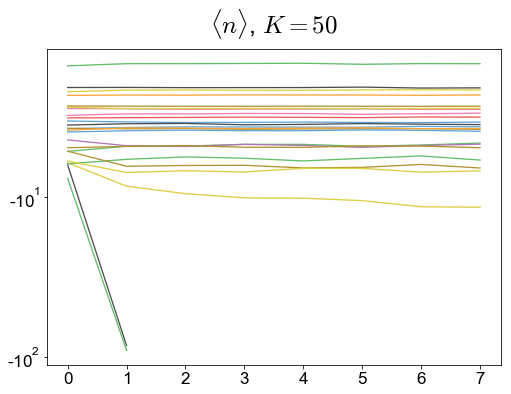

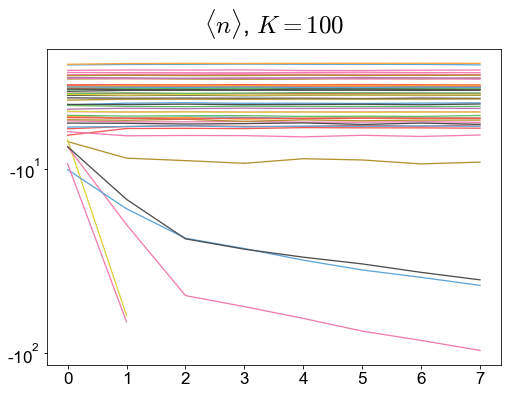

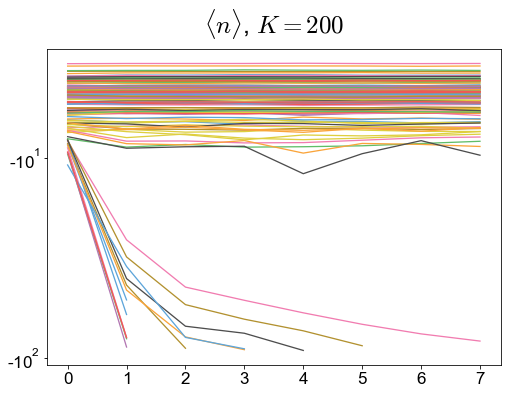

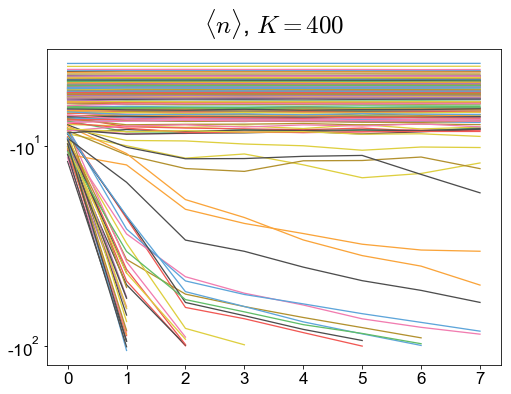

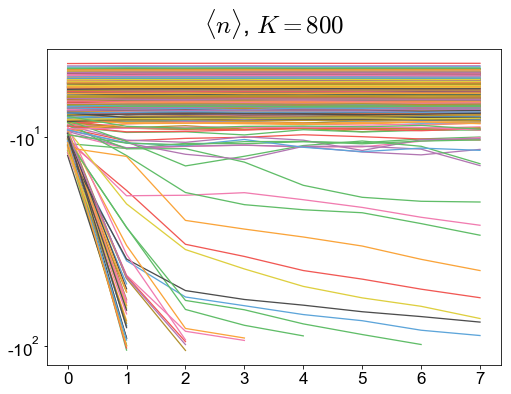

In [205]:
for i,K in enumerate(Ks):
    plt.figure()
    ns = np.zeros((len(exp_data[K]['n_mean_ave_list']),K))
    for k in range(K):
        for j in range(len(exp_data[K]['n_mean_ave_list'])):
            ns[j,k] = exp_data[K]['n_mean_ave_list'][j][k]
    
    plt.plot(np.log(ns))
    plt.title(r'$\langle n \rangle$, $K = {}$'.format(K),y=1.03)
    plt.yscale('symlog')
    
    

We can see that we are in a good regime by making ordered plots of $T_{ext}$, the extinction times
of different types. The curves become very vertical, indicating larger and larger extinction times,
which suggest we have come (at least close to) equilibrating.

In [6]:
eta_antisym = [exp_data[K]['eta_from_antisymmetric'] for K in Ks]
surv_prob = [np.array([~np.isfinite(t_ext) for t_ext in exp_data[K]['extinct_time_array']]) for K in Ks]

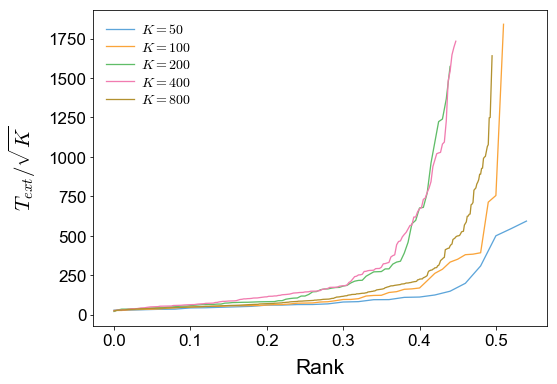

In [207]:
plt.figure()
for i,K in enumerate(Ks):
    plt.plot(np.arange(K)/(1.*K),np.sort(exp_data[K]['extinct_time_array'])/np.sqrt(K),label='$K = {}$'.format(K))
    #plt.hlines(y=exp_data[K]['epoch_time']*exp_data[K]['epoch_num'],xmin=0,xmax=1.0,linestyle='--',color='C{}'.format(i))
plt.xlabel('Rank')
plt.ylabel('$T_{ext}/\sqrt{K}$')
plt.legend()

Below we plot a comparison of our two methods of computing $\eta$; we see that they are similar. The
systematic bias for large $\eta$ is due to the noise in estimating $\chi$ from $V$.

In [7]:
# estimate etas

eta_hat = len(Ks)*[None]


for i,K in enumerate(Ks):
    V = exp_data[K]['V']
    gamma = exp_data[K]['gamma']
    lambda_mean = np.mean(np.array(exp_data[K]['lambda_mean_ave_list'])[2:])
    n_means = np.array(exp_data[K]['n_mean_ave_list'])
    n_mean = np.mean(n_means[2:,:],axis=0)
    chi = K*np.mean(V @ n_mean)/gamma
    eta_hat[i] = V @ n_mean - gamma*chi*n_mean
    eta_hat[i] = eta_hat[i]
    


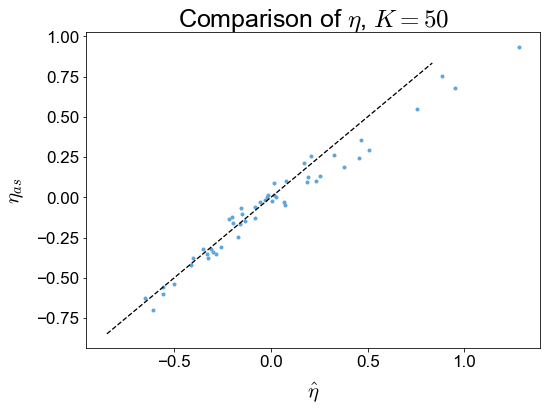

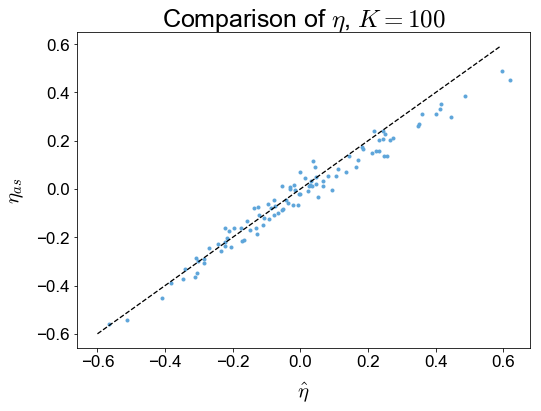

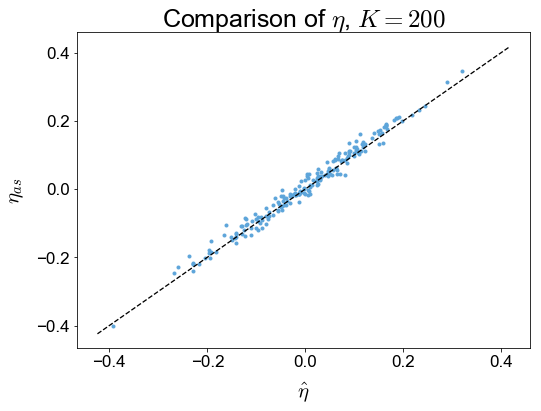

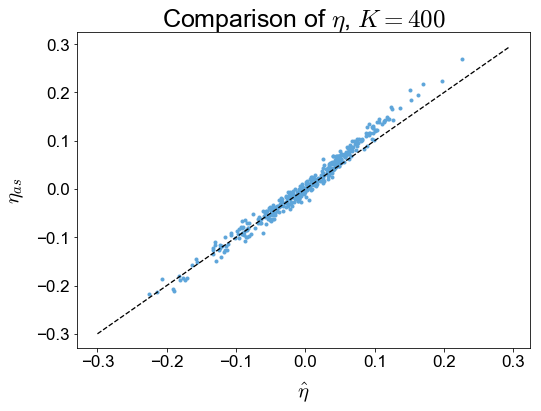

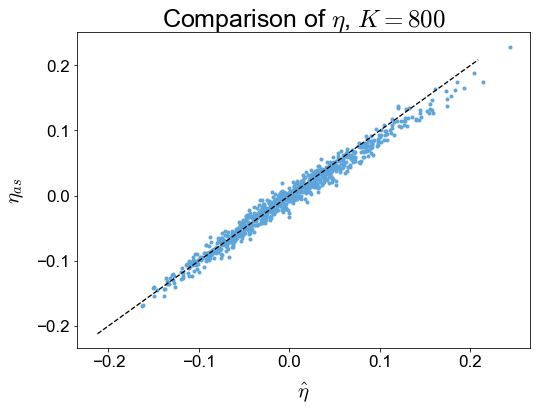

In [209]:
for i,K in enumerate(Ks):
    plt.figure()
    plt.plot(eta_hat[i],eta_antisym[i],ls='None',marker='.')
    plt.plot(np.arange(-6,6,0.1)/np.sqrt(K),np.arange(-6,6,0.1)/np.sqrt(K),ls='--',color='k')
    plt.xlabel('$\hat{\eta}$')
    plt.ylabel('$\eta_{as}$')
    plt.title('Comparison of $\eta$, $K = {}$'.format(K))

We now try to understand the relationship between $\eta$ and survival. One way to do this is to plot
whether or not the type survived as a function of $\eta$. From this plot we see that larger $\eta$
(particularly $\eta>0$) tend to survive; however, it is hard to make quantiative comparisons.

22 out of 50 survive
48 out of 100 survive
111 out of 200 survive
220 out of 400 survive
403 out of 800 survive


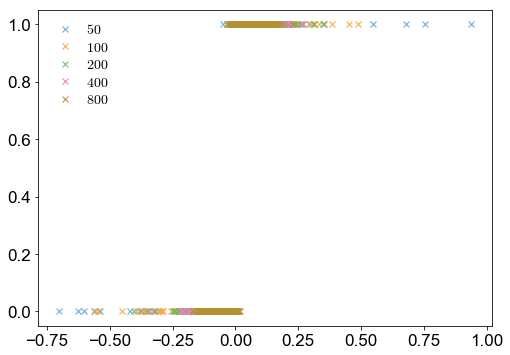

In [210]:
# survival probability vs. antisymmetric $\eta$

plt.figure()
for i,K in enumerate(Ks):
    plt.plot(eta_antisym[i],surv_prob[i],ls='None', marker='x',label='${}$'.format(K))
    print('{} out of {} survive'.format(np.sum(surv_prob[i]),len(surv_prob[i])))

plt.legend()


In [8]:
# survival CDF

surv_CDF = len(Ks)*[None]

for i,K in enumerate(Ks):
    sort_idx = np.argsort(eta_antisym[i])
    surv_CDF[i] = np.zeros(len(sort_idx))

    surv_CDF[i][0] = surv_prob[i][sort_idx[0]]

    for j,idx in enumerate(sort_idx[1:]):
        surv_CDF[i][j+1] = surv_CDF[i][j]+surv_prob[i][idx]


We can instead plot the cumulative surviving fraction - the fraction of types with $\eta'<\eta$
which survive.

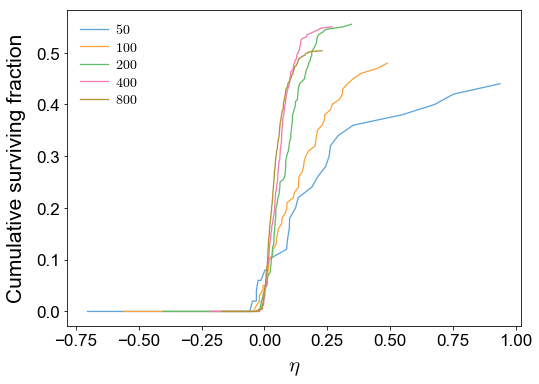

In [212]:
plt.figure()

for i,K in enumerate(Ks):
    plt.plot(np.sort(eta_antisym[i]),surv_CDF[i]/K,label='${}$'.format(K))
plt.xlabel('$\eta$')
plt.ylabel('Cumulative surviving fraction')
plt.legend()

In [213]:
# null models

null_samps = 3000
gauss_samps = np.sqrt(np.pi)*np.sort(np.random.randn(null_samps))


half_gauss_null = np.zeros(null_samps) # only non-negatives survive

for i,z in enumerate(gauss_samps[1:]):
    half_gauss_null[i+1] = half_gauss_null[i]
    if z>0:
        half_gauss_null[i+1] += 1

half_gauss_null = half_gauss_null*1./null_samps


For varying $K$, we can rescale $\eta$ by $\sqrt{K}$ to try to get the curves to collapse on each other.
The expected curves for a Gaussian distribution of $\eta$ with all $\eta$ surviving and all
$\eta>0$ surviving are plotted for reference.

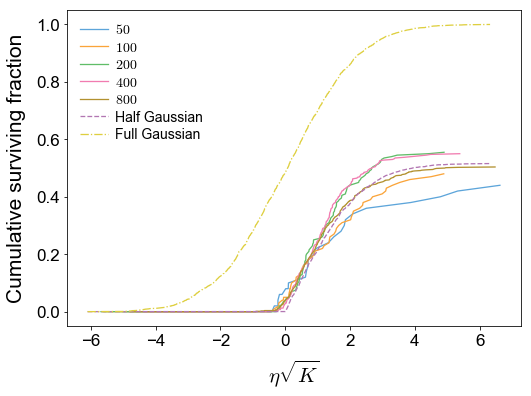

In [214]:
# rescaled etas

plt.figure()

for i,K in enumerate(Ks):
    plt.plot(np.sqrt(K)*np.sort(eta_antisym[i]),surv_CDF[i]/K,label='${}$'.format(K))
    
# null models
plt.plot(gauss_samps,half_gauss_null,label='Half Gaussian',ls='--')
plt.plot(gauss_samps,np.linspace(0.0,1.0,null_samps),label=r'Full Gaussian',ls='-.')


plt.xlabel('$\eta\sqrt{K}$')
plt.ylabel('Cumulative surviving fraction')
plt.legend()

A better way to plot is to take advantage of the fact that $\eta$ is normally distributed in the mean
field limit, and plot against $\Phi(\eta\sqrt{K})$ (CDF of a standard normal). Now the slope becomes
the probability of survival at a given $\eta$. We see that there are only small differences between the $K$;
it seems that the mean field $\eta$ is, to a good approximation, what controls the survival probabilities.

Note that from this plot, we can see that the antisymmetric $\eta$ roughly captures the "actual $\eta$" 
behavior for small $\epsilon$; however, there are still deviations, which on the plot show up as
alternating flat and steep regions.

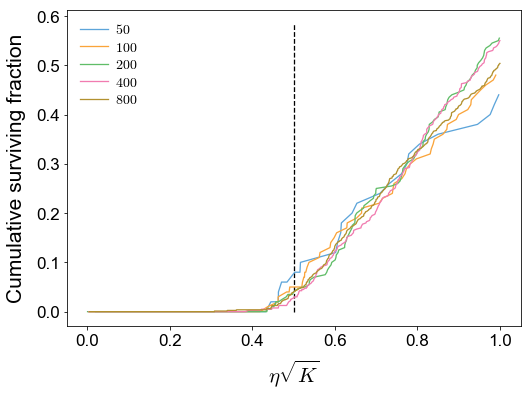

In [9]:
# rescaled etas

plt.figure()

for i,K in enumerate(Ks):
    eta_scale = np.sqrt(np.var(eta_antisym[i]))
    cdf_vals = norm.cdf(np.sort(eta_antisym[i])/eta_scale)
    plt.plot(cdf_vals,surv_CDF[i]/K,label='${}$'.format(K))
# null models
#plt.plot(gauss_samps,half_gauss_null,label='Half Gaussian',ls='--')
#plt.plot(gauss_samps,np.linspace(0.0,1.0,null_samps),label=r'Full Gaussian',ls='-.')
ys = plt.ylim()
plt.vlines(x=0.5,ymin=0,ymax=ys[1],linestyle='--', color='k')

plt.xlabel('$\eta\sqrt{K}$')
plt.ylabel('Cumulative surviving fraction')
plt.legend()

Plotting the survival probability vs. $K$, we see a non-monotonicity; initially the survival probability
increases with $K$, but then it eventually decreases. This is likely due to the fact that the log migration
$M\equiv -\log(m)$ is effectively rescaled by $\frac{1}{2}\ln(K)$; more exploration is needed to nail down
the exact dependences. Regardless, the survival probability doesn't monotonically increase with $K$
as it would if there were some critical absolute scale $\eta_{c}$ for survival.

Text(0.5,1.03,'Survival probability vs. $K$')

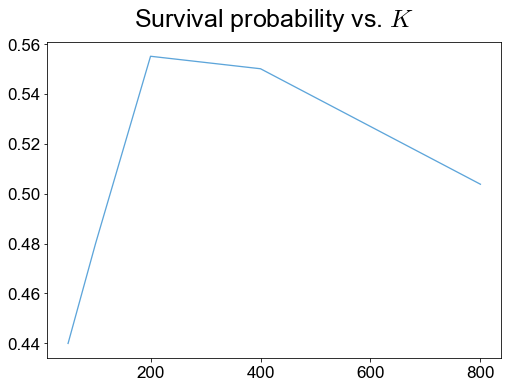

In [218]:
# survival probability vs. K

surv_frac = np.array([np.sum(surv)/len(surv) for surv in surv_prob])
plt.plot(Ks,surv_frac)
plt.title('Survival probability vs. $K$',y=1.03)

Below we repeat the same analysis for the values of $\eta$ derived from $V$ and $\langle n\rangle$,
and get a similar picture.

22 out of 50 survive
48 out of 100 survive
111 out of 200 survive
220 out of 400 survive
403 out of 800 survive


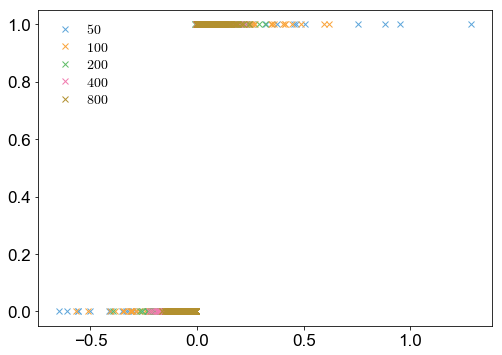

In [219]:
# survival probability vs. $\hat{\eta}$

plt.figure()
for i,K in enumerate(Ks):
    plt.plot(eta_hat[i],surv_prob[i],ls='None', marker='x',label='${}$'.format(K))
    print('{} out of {} survive'.format(np.sum(surv_prob[i]),len(surv_prob[i])))

plt.legend()
    


In [10]:
# survival CDF

surv_CDF = len(Ks)*[None]

for i,K in enumerate(Ks):
    sort_idx = np.argsort(eta_hat[i])
    surv_CDF[i] = np.zeros(len(sort_idx))

    surv_CDF[i][0] = surv_prob[i][sort_idx[0]]

    for j,idx in enumerate(sort_idx[1:]):
        surv_CDF[i][j+1] = surv_CDF[i][j]+surv_prob[i][idx]


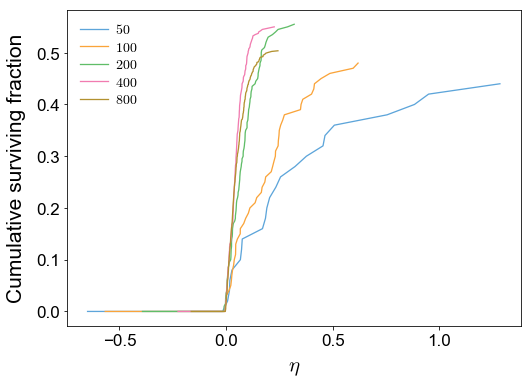

In [221]:
plt.figure()

for i,K in enumerate(Ks):
    plt.plot(np.sort(eta_hat[i]),surv_CDF[i]/K,label='${}$'.format(K))
plt.xlabel('$\eta$')
plt.ylabel('Cumulative surviving fraction')
plt.legend()

In [222]:
# null models

null_samps = 3000
gauss_samps = np.sqrt(np.pi)*np.sort(np.random.randn(null_samps))


half_gauss_null = np.zeros(null_samps) # only non-negatives survive

for i,z in enumerate(gauss_samps[1:]):
    half_gauss_null[i+1] = half_gauss_null[i]
    if z>0:
        half_gauss_null[i+1] += 1

half_gauss_null = half_gauss_null*1./null_samps


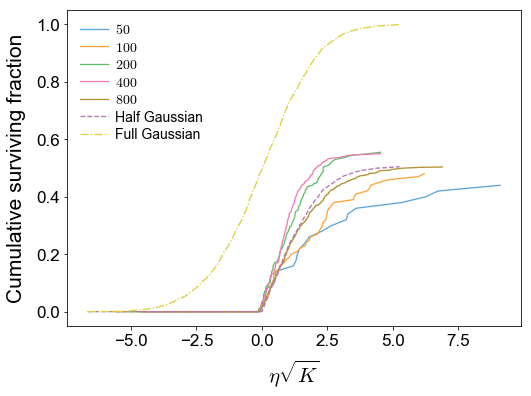

In [223]:
# rescaled etas

plt.figure()

for i,K in enumerate(Ks):
    plt.plot(np.sqrt(K)*np.sort(eta_hat[i]),surv_CDF[i]/K,label='${}$'.format(K))
    
# null models
plt.plot(gauss_samps,half_gauss_null,label='Half Gaussian',ls='--')
plt.plot(gauss_samps,np.linspace(0.0,1.0,null_samps),label=r'Full Gaussian',ls='-.')


plt.xlabel('$\eta\sqrt{K}$')
plt.ylabel('Cumulative surviving fraction')
plt.legend()

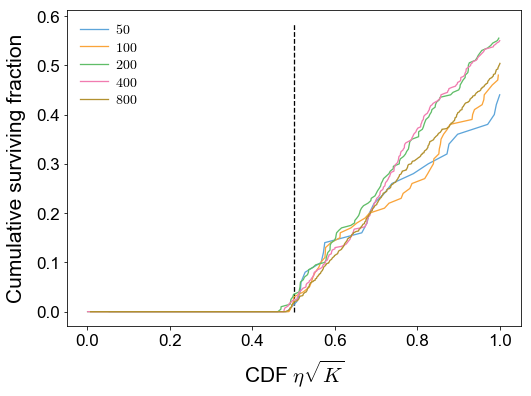

In [11]:
# rescaled etas

plt.figure()

for i,K in enumerate(Ks):
    eta_scale = np.sqrt(np.var(eta_hat[i]))
    cdf_vals = norm.cdf(np.sort(eta_hat[i])/eta_scale)
    plt.plot(cdf_vals,surv_CDF[i]/K,label='${}$'.format(K))
    
# null models
#plt.plot(gauss_samps,half_gauss_null,label='Half Gaussian',ls='--')
#plt.plot(gauss_samps,np.linspace(0.0,1.0,null_samps),label=r'Full Gaussian',ls='-.')
ys = plt.ylim()
plt.vlines(x=0.5,ymin=0,ymax=ys[1],linestyle='--', color='k')

plt.xlabel('CDF $\eta\sqrt{K}$')
plt.ylabel('Cumulative surviving fraction')
plt.legend()

## Varying $K$, large $\epsilon$

We repeat the previous set of plots for larger $\epsilon\approx 0.05$ (so still near antisymmetric).
We have similar results to before, except now a larger fraction survive at all $K$.

In [12]:
# file_name = 'test_island_evo'

seed = 878943+32948

D = 10
Ks = [50,100,200,400,800]
M = 10  #M = log(1/m)
gamma = -0.95
logN = 10*M
thresh = -logN


file_base = 'K_scaling_test_large_eps'

# ie.ManyIslandsSim(file_name,D,K,M,gamma,thresh,dt,seed,epoch_time,epoch_num,sample_time)

# ie.InfiniteIslandsSim(file_name,K,M,gamma,dt,seed,epoch_times,sample_time)




In [226]:
for K in Ks:
    t0 = 3*M*K**(1./2)
    dt = (.3)*(M**(-0.5))*K**(1./2)
    sample_time = 20
    epoch_time = 5*t0
    epoch_num = 8
    sample_epoch_start = 5

    epoch_times = epoch_time*np.ones((epoch_num))

    file_name = file_base+'{}'.format(K)
    ie.ExtinctionTimeLong(file_name,D,K,M,gamma,thresh,dt,seed,epoch_time,epoch_num,sample_time)

/home/atish/Dropbox/Ecology/Bacteria phage code/island-evo/island_evo_simulation_methods.py:834: RuntimeWarning: divide by zero encountered in true_divide
  mig_mean_array += np.mean(np.divide(nbar, n0), axis=0)
/home/atish/Dropbox/Ecology/Bacteria phage code/island-evo/island_evo_simulation_methods.py:834: RuntimeWarning: invalid value encountered in true_divide
  mig_mean_array += np.mean(np.divide(nbar, n0), axis=0)


1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8


In [13]:
# import data

exp_data = {}

for K in Ks:
    file_name = file_base+'{}'.format(K)+'.npz'
    with np.load(file_name) as data:
        exp_data[K] = data['class_obj'].item()


In [14]:
eta_antisym = [exp_data[K]['eta_from_antisymmetric'] for K in Ks]
surv_prob = [np.array([~np.isfinite(t_ext) for t_ext in exp_data[K]['extinct_time_array']]) for K in Ks]

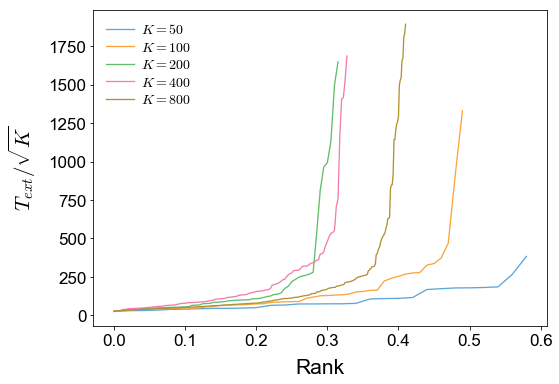

In [229]:
plt.figure()
for i,K in enumerate(Ks):
    plt.plot(np.arange(K)/(1.*K),np.sort(exp_data[K]['extinct_time_array'])/np.sqrt(K),label='$K = {}$'.format(K))
    #plt.hlines(y=exp_data[K]['epoch_time']*exp_data[K]['epoch_num'],xmin=0,xmax=1.0,linestyle='--',color='C{}'.format(i))
plt.xlabel('Rank')
plt.ylabel('$T_{ext}/\sqrt{K}$')
plt.legend()

In [15]:
# estimate etas

eta_hat = len(Ks)*[None]


for i,K in enumerate(Ks):
    V = exp_data[K]['V']
    gamma = exp_data[K]['gamma']
    lambda_mean = np.mean(np.array(exp_data[K]['lambda_mean_ave_list'])[2:])
    n_means = np.array(exp_data[K]['n_mean_ave_list'])
    n_mean = np.mean(n_means[2:,:],axis=0)
    chi = K*np.mean(V @ n_mean)/gamma
    eta_hat[i] = V @ n_mean - gamma*chi*n_mean
    eta_hat[i] = eta_hat[i]
    


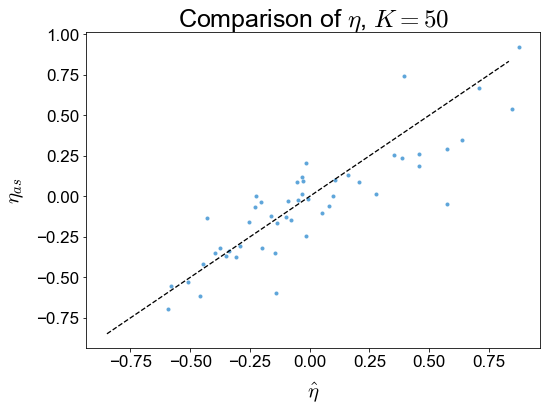

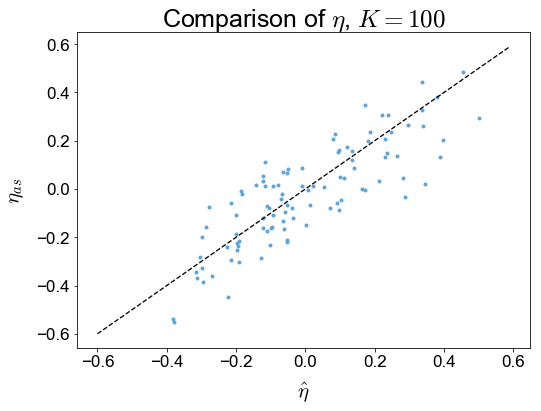

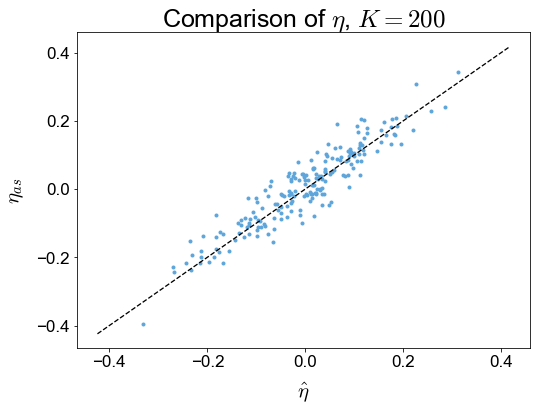

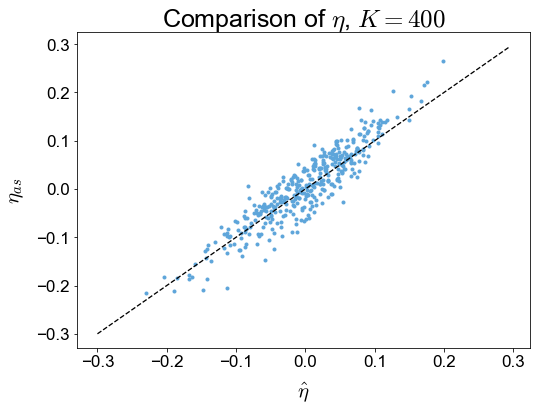

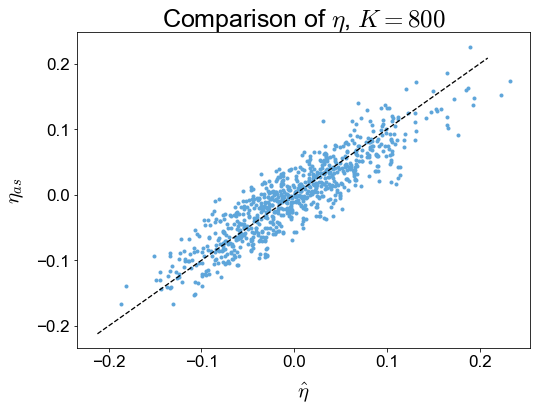

In [231]:
for i,K in enumerate(Ks):
    plt.figure()
    plt.plot(eta_hat[i],eta_antisym[i],ls='None',marker='.')
    plt.plot(np.arange(-6,6,0.1)/np.sqrt(K),np.arange(-6,6,0.1)/np.sqrt(K),ls='--',color='k')
    plt.xlabel('$\hat{\eta}$')
    plt.ylabel('$\eta_{as}$')
    plt.title('Comparison of $\eta$, $K = {}$'.format(K))

20 out of 50 survive
50 out of 100 survive
136 out of 200 survive
268 out of 400 survive
471 out of 800 survive


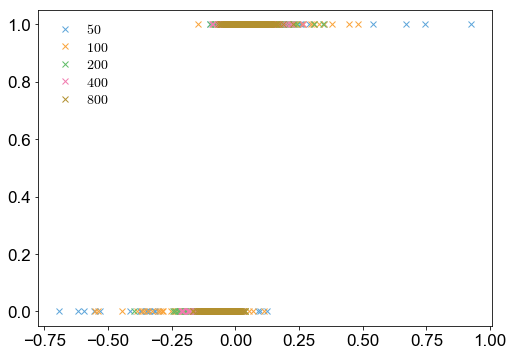

In [232]:
# survival probability vs. antisymmetric $\eta$

plt.figure()
for i,K in enumerate(Ks):
    plt.plot(eta_antisym[i],surv_prob[i],ls='None', marker='x',label='${}$'.format(K))
    print('{} out of {} survive'.format(np.sum(surv_prob[i]),len(surv_prob[i])))

plt.legend()


In [17]:
# survival CDF

surv_CDF = len(Ks)*[None]

for i,K in enumerate(Ks):
    sort_idx = np.argsort(eta_antisym[i])
    surv_CDF[i] = np.zeros(len(sort_idx))

    surv_CDF[i][0] = surv_prob[i][sort_idx[0]]

    for j,idx in enumerate(sort_idx[1:]):
        surv_CDF[i][j+1] = surv_CDF[i][j]+surv_prob[i][idx]


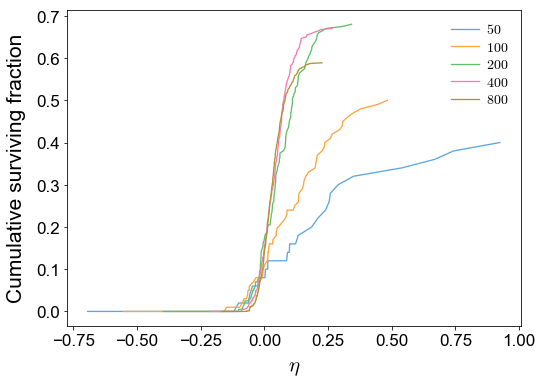

In [246]:
plt.figure()

for i,K in enumerate(Ks):
    plt.plot(np.sort(eta_antisym[i]),surv_CDF[i]/K,label='${}$'.format(K))
plt.xlabel('$\eta$')
plt.ylabel('Cumulative surviving fraction')
plt.legend()

In [247]:
# null models

null_samps = 3000
gauss_samps = np.sqrt(np.pi)*np.sort(np.random.randn(null_samps))


half_gauss_null = np.zeros(null_samps) # only non-negatives survive

for i,z in enumerate(gauss_samps[1:]):
    half_gauss_null[i+1] = half_gauss_null[i]
    if z>0:
        half_gauss_null[i+1] += 1

half_gauss_null = half_gauss_null*1./null_samps


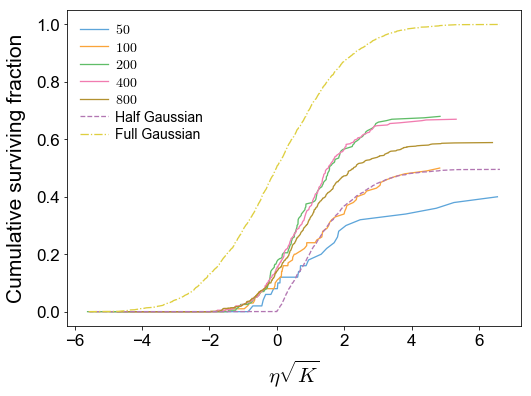

In [248]:
# rescaled etas

plt.figure()

for i,K in enumerate(Ks):
    plt.plot(np.sqrt(K)*np.sort(eta_antisym[i]),surv_CDF[i]/K,label='${}$'.format(K))
    
# null models
plt.plot(gauss_samps,half_gauss_null,label='Half Gaussian',ls='--')
plt.plot(gauss_samps,np.linspace(0.0,1.0,null_samps),label=r'Full Gaussian',ls='-.')


plt.xlabel('$\eta\sqrt{K}$')
plt.ylabel('Cumulative surviving fraction')
plt.legend()

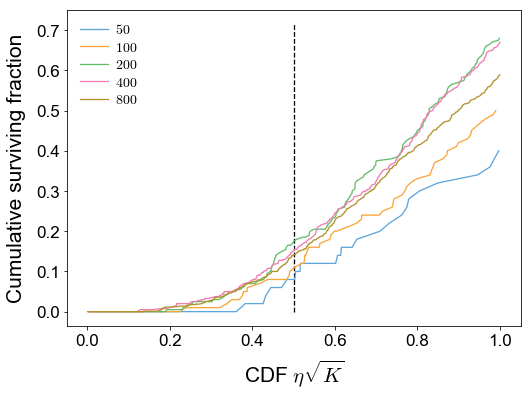

In [18]:
# rescaled etas

plt.figure()

for i,K in enumerate(Ks):
    eta_scale = np.sqrt(np.var(eta_antisym[i]))
    cdf_vals = norm.cdf(np.sort(eta_antisym[i])/eta_scale)
    plt.plot(cdf_vals,surv_CDF[i]/K,label='${}$'.format(K))
    
# null models
#plt.plot(gauss_samps,half_gauss_null,label='Half Gaussian',ls='--')
#plt.plot(gauss_samps,np.linspace(0.0,1.0,null_samps),label=r'Full Gaussian',ls='-.')
ys = plt.ylim()
plt.vlines(x=0.5,ymin=0,ymax=ys[1],linestyle='--', color='k')

plt.xlabel('CDF $\eta\sqrt{K}$')
plt.ylabel('Cumulative surviving fraction')
plt.legend()

Text(0.5,1.03,'Survival probability vs. $K$')

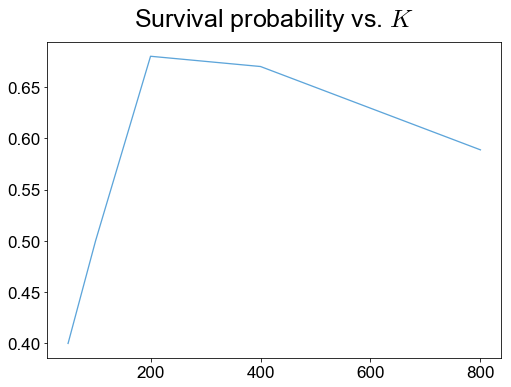

In [19]:
# survival probability vs. K

surv_frac = np.array([np.sum(surv)/len(surv) for surv in surv_prob])
plt.plot(Ks,surv_frac)
plt.title('Survival probability vs. $K$',y=1.03)

20 out of 50 survive
50 out of 100 survive
136 out of 200 survive
268 out of 400 survive
471 out of 800 survive


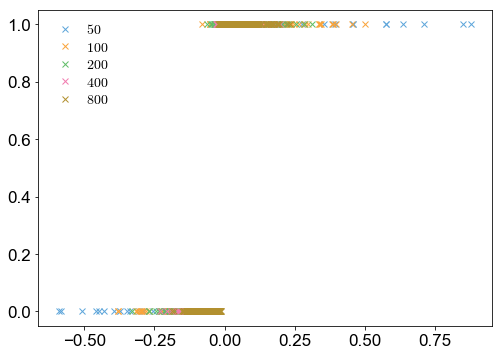

In [251]:
# survival probability vs. $\hat{\eta}$

plt.figure()
for i,K in enumerate(Ks):
    plt.plot(eta_hat[i],surv_prob[i],ls='None', marker='x',label='${}$'.format(K))
    print('{} out of {} survive'.format(np.sum(surv_prob[i]),len(surv_prob[i])))

plt.legend()
    


We again plot against the $n$-average derived $\eta$. Here we see that the minimal $\eta$ required for survival
correlates much better with this estimate of $\eta$ than the antisymmetric estimate, as to be expected.

In [20]:
# survival CDF

surv_CDF = len(Ks)*[None]

for i,K in enumerate(Ks):
    sort_idx = np.argsort(eta_hat[i])
    surv_CDF[i] = np.zeros(len(sort_idx))

    surv_CDF[i][0] = surv_prob[i][sort_idx[0]]

    for j,idx in enumerate(sort_idx[1:]):
        surv_CDF[i][j+1] = surv_CDF[i][j]+surv_prob[i][idx]


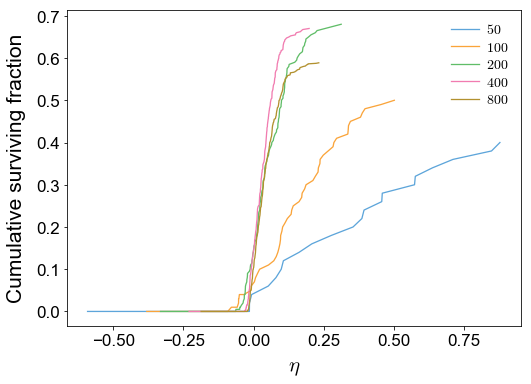

In [253]:
plt.figure()

for i,K in enumerate(Ks):
    plt.plot(np.sort(eta_hat[i]),surv_CDF[i]/K,label='${}$'.format(K))
plt.xlabel('$\eta$')
plt.ylabel('Cumulative surviving fraction')
plt.legend()

In [254]:
# null models

null_samps = 3000
gauss_samps = np.sqrt(np.pi)*np.sort(np.random.randn(null_samps))


half_gauss_null = np.zeros(null_samps) # only non-negatives survive

for i,z in enumerate(gauss_samps[1:]):
    half_gauss_null[i+1] = half_gauss_null[i]
    if z>0:
        half_gauss_null[i+1] += 1

half_gauss_null = half_gauss_null*1./null_samps


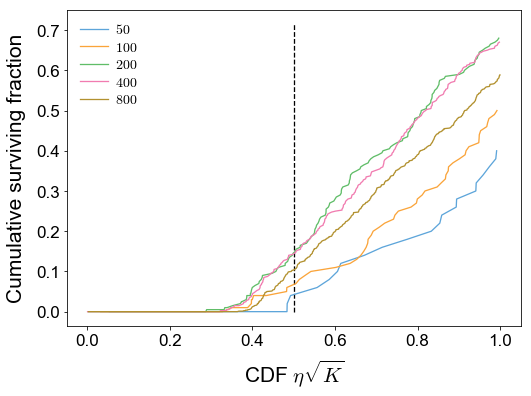

In [21]:
# rescaled etas

plt.figure()

for i,K in enumerate(Ks):
    eta_scale = np.sqrt(np.var(eta_hat[i]))
    cdf_vals = norm.cdf(np.sort(eta_hat[i])/eta_scale)
    plt.plot(cdf_vals,surv_CDF[i]/K,label='${}$'.format(K))
    
# null models
#plt.plot(gauss_samps,half_gauss_null,label='Half Gaussian',ls='--')
#plt.plot(gauss_samps,np.linspace(0.0,1.0,null_samps),label=r'Full Gaussian',ls='-.')

ys = plt.ylim()
plt.vlines(x=0.5,ymin=0,ymax=ys[1],linestyle='--', color='k')

plt.xlabel('CDF $\eta\sqrt{K}$')
plt.ylabel('Cumulative surviving fraction')
plt.legend()

## Varying $\epsilon$

The above numerical results suggest that at least near $\epsilon = 0$, the fraction of surviving types
is increasing with $\epsilon$ (from $0.5$ at $\epsilon = 0$). The below numerics confirm this picture.
Note that this is in contrast to larger $\epsilon$ ($\epsilon>0.1$) where the surviving fraction decreases
with $\epsilon$.

In [36]:
# file_name = 'test_island_evo'

seed = 878943+32948

D = 10
K = 300
M = 10  #M = log(1/m)
epsilons = [3e-4,1e-3,3e-3,1e-2,3e-2,1e-1]

logN = 10*M
thresh = -logN


file_base = 'eps_scaling_test'

# ie.ManyIslandsSim(file_name,D,K,M,gamma,thresh,dt,seed,epoch_time,epoch_num,sample_time)

# ie.InfiniteIslandsSim(file_name,K,M,gamma,dt,seed,epoch_times,sample_time)




In [37]:
for eps in epsilons:
    gamma = -1+eps
    t0 = 3*M*K**(1./2)
    dt = (.1)*(M**(-0.5))*K**(1./2)
    sample_time = 20
    epoch_time = 5*t0
    epoch_num = 7
    sample_epoch_start = 2

    epoch_times = epoch_time*np.ones((epoch_num))

    file_name = file_base+'{}'.format(eps)
    ie.ExtinctionTimeLong(file_name,D,K,M,gamma,thresh,dt,seed,epoch_time,epoch_num,sample_time)

/home/atish/Dropbox/Ecology/Bacteria phage code/island-evo/island_evo_simulation_methods.py:834: RuntimeWarning: divide by zero encountered in true_divide
  temp_rats = np.divide(nbar, n0) # remove infinities
/home/atish/Dropbox/Ecology/Bacteria phage code/island-evo/island_evo_simulation_methods.py:834: RuntimeWarning: invalid value encountered in true_divide
  temp_rats = np.divide(nbar, n0) # remove infinities


1
2
3
4
5
6
7
1
2
3
4
5
6
7
1
2
3
4
5
6
7
1
2
3
4
5
6
7
1
2
3
4
5
6
7
1
2
3
4
5
6
7


In [38]:
# import data

exp_data = {}

for eps in epsilons:
    file_name = file_base+'{}'.format(eps)+'.npz'
    with np.load(file_name) as data:
        exp_data[eps] = data['class_obj'].item()


In [39]:
eta_antisym = [exp_data[eps]['eta_from_antisymmetric'] for eps in epsilons]
surv_prob = [np.array([~np.isfinite(t_ext) for t_ext in exp_data[eps]['extinct_time_array']]) for eps in epsilons]

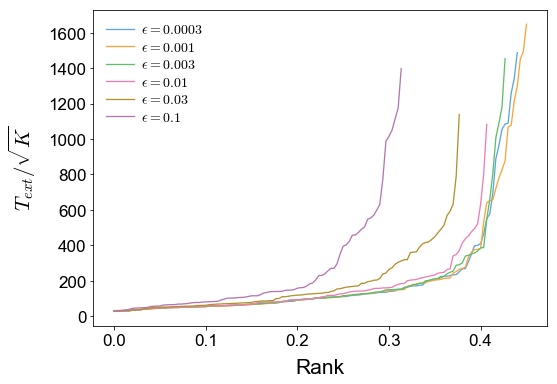

In [40]:
plt.figure()
for i,eps in enumerate(epsilons):
    plt.plot(np.arange(K)/(1.*K),np.sort(exp_data[eps]['extinct_time_array'])/np.sqrt(K),label='$\epsilon = {}$'.format(eps))
    #plt.hlines(y=exp_data[K]['epoch_time']*exp_data[K]['epoch_num'],xmin=0,xmax=1.0,linestyle='--',color='C{}'.format(i))
plt.xlabel('Rank')
plt.ylabel('$T_{ext}/\sqrt{K}$')
plt.legend()

In [49]:
# cumulative distributions of <n>

sorted_ns = [np.sort(exp_data[eps]['n_mean_ave_list'][-1]) for eps in epsilons]
cum_ns = [np.zeros(K) for eps in epsilons]

for i,eps in enumerate(epsilons):
    cum_ns[i][0] = sorted_ns[i][0]
    for k in range(1,K):
        cum_ns[i][k] = cum_ns[i][k-1]+sorted_ns[i][k]


One question is whether or not the types with negative $\eta$/small $\langle n\rangle$ contribute much to
the total population. At least for small $\epsilon$, the answer seems to be no;

Text(0.5,1.03,'Distribution of $\\langle n\\rangle$')

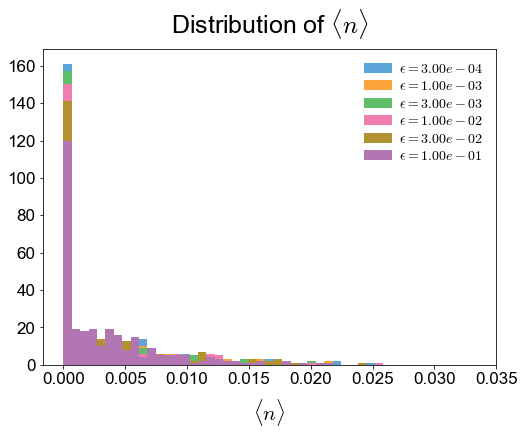

In [42]:
bin_vec = np.linspace(0.0,10.0/K,50)

plt.figure()
for eps in epsilons:
    plt.hist(exp_data[eps]['n_mean_ave_list'][-1],label='$\epsilon = {:.2e}$'.format(eps),bins=bin_vec)
plt.legend()
plt.xlabel(r'$\langle n\rangle$')
plt.title(r'Distribution of $\langle n\rangle$',y=1.03)

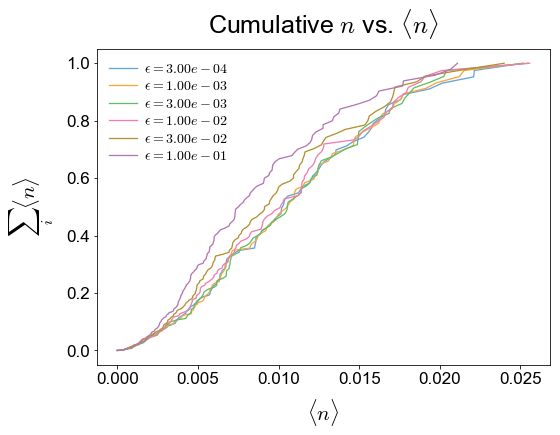

In [43]:
plt.figure()
for i,eps in enumerate(epsilons):
    plt.plot(sorted_ns[i],cum_ns[i],label='$\epsilon = {:.2e}$'.format(eps))
plt.xlabel(r'$\langle n\rangle$')
plt.ylabel(r'$\sum_{i} \langle n\rangle$')
plt.title(r'Cumulative $n$ vs. $\langle n\rangle$',y=1.03)
plt.legend()

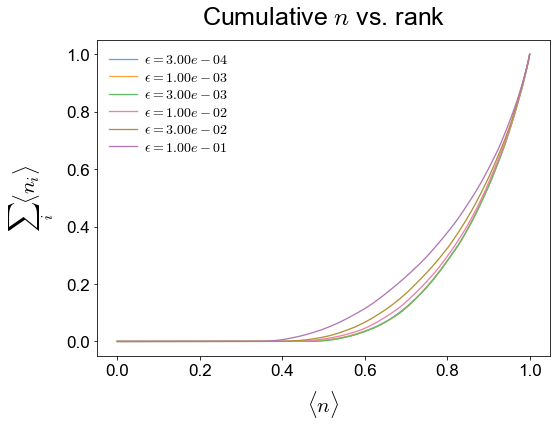

In [47]:
plt.figure()
for i,eps in enumerate(epsilons):
    plt.plot(np.linspace(0.0,1.0,K),cum_ns[i],label='$\epsilon = {:.2e}$'.format(eps))
plt.xlabel(r'$\langle n\rangle$')
plt.ylabel(r'$\sum_{i} \langle n_i\rangle$')
plt.title(r'Cumulative $n$ vs. rank',y=1.03)
plt.legend()

In [51]:
exp_data[eps].keys()

dict_keys(['file_name', 'D', 'K', 'M', 'gamma', 'thresh', 'epoch_time', 'epoch_num', 'dt', 'seed', 'sample_time', 'N', 'm', 'epoch_steps', 'sample_num', 'V', 'n0', 'x0', 'increment', 'V1', 'K1', 'n_mean_ave_list', 'n2_mean_ave_list', 'n_cross_mean_list', 'mig_mean_list', 'eta_mean_list', 'eta_from_antisymmetric', 'lambda_mean_ave_list', 'n_mean_std_list', 'n2_mean_std_list', 'lambda_mean_std_list', 'autocorr_list', 'n_init_list', 'extinct_time_array', 'corr_tvec'])

In [56]:
# cumulative distributions of <n>

sorted_n2s = [np.sort(exp_data[eps]['n2_mean_ave_list'][-1]) for eps in epsilons]
cum_n2s = [np.zeros(K) for eps in epsilons]

for i,eps in enumerate(epsilons):
    cum_n2s[i][0] = sorted_n2s[i][0]
    for k in range(1,K):
        cum_n2s[i][k] = cum_n2s[i][k-1]+sorted_n2s[i][k]


Text(0.5,1.03,'Distribution of $\\langle n^{2}\\rangle$')

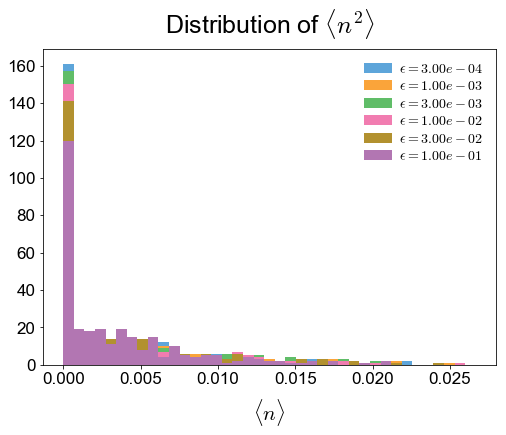

In [57]:
bin_vec = np.linspace(0.0,8.0/K,40)

plt.figure()
for eps in epsilons:
    plt.hist(exp_data[eps]['n2_mean_ave_list'][-1],label='$\epsilon = {:.2e}$'.format(eps),bins=bin_vec)
plt.legend()
plt.xlabel(r'$\langle n\rangle$')
plt.title(r'Distribution of $\langle n^{2}\rangle$',y=1.03)

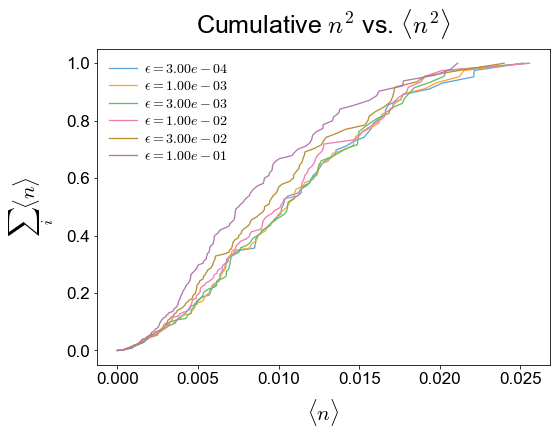

In [58]:
plt.figure()
for i,eps in enumerate(epsilons):
    plt.plot(sorted_n2s[i],cum_n2s[i],label='$\epsilon = {:.2e}$'.format(eps))
plt.xlabel(r'$\langle n\rangle$')
plt.ylabel(r'$\sum_{i} \langle n\rangle$')
plt.title(r'Cumulative $n^{2}$ vs. $\langle n^{2}\rangle$',y=1.03)
plt.legend()

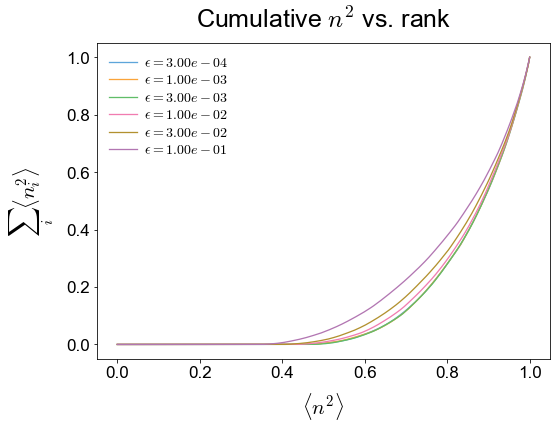

In [59]:
plt.figure()
for i,eps in enumerate(epsilons):
    plt.plot(np.linspace(0.0,1.0,K),cum_n2s[i],label='$\epsilon = {:.2e}$'.format(eps))
plt.xlabel(r'$\langle n^{2}\rangle$')
plt.ylabel(r'$\sum_{i} \langle n_i^{2}\rangle$')
plt.title(r'Cumulative $n^{2}$ vs. rank',y=1.03)
plt.legend()

In [45]:
# estimate etas

eta_hat = len(epsilons)*[None]


for i,eps in enumerate(epsilons):
    V = exp_data[eps]['V']
    gamma = exp_data[eps]['gamma']
    lambda_mean = np.mean(np.array(exp_data[eps]['lambda_mean_ave_list'])[2:])
    n_means = np.array(exp_data[eps]['n_mean_ave_list'])
    n_mean = np.mean(n_means[2:,:],axis=0)
    chi = K*np.mean(V @ n_mean)/gamma
    eta_hat[i] = V @ n_mean - gamma*chi*n_mean
    eta_hat[i] = eta_hat[i]
    


Below, we see that as $\epsilon$ increases, the estimation of $\eta$ from the antisymmetric part of
$V$ gets worse.

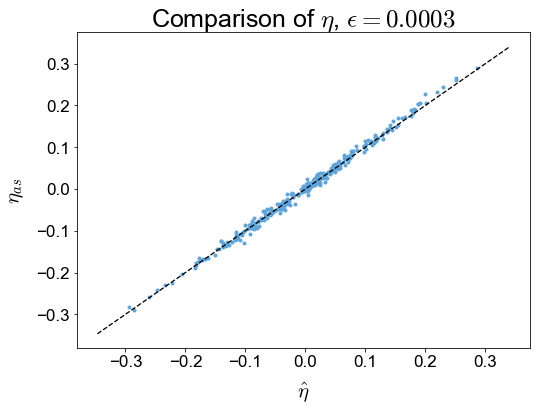

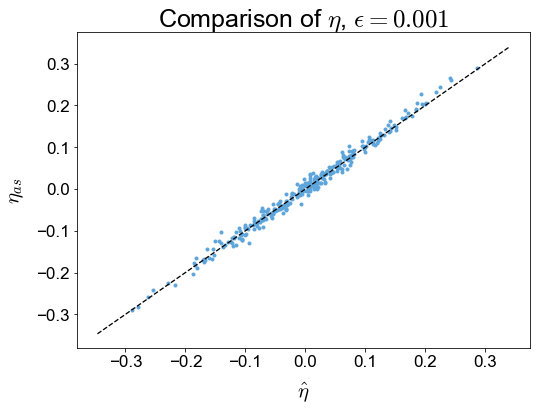

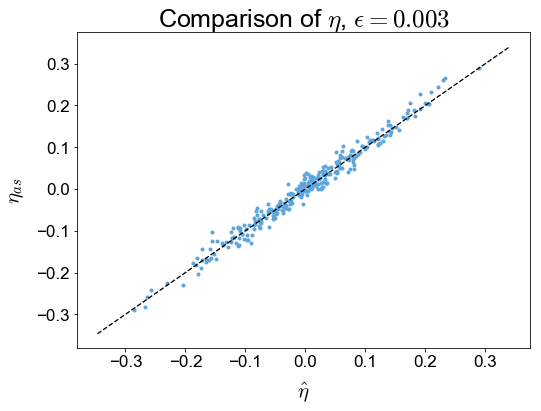

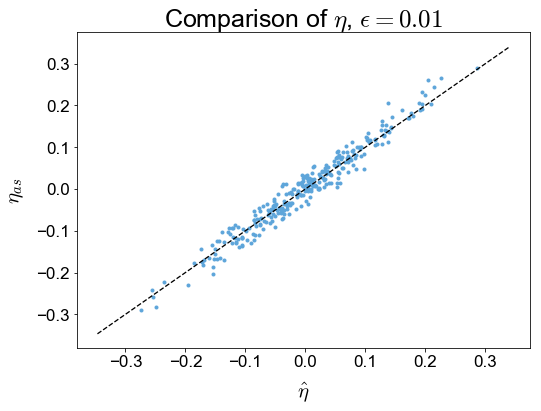

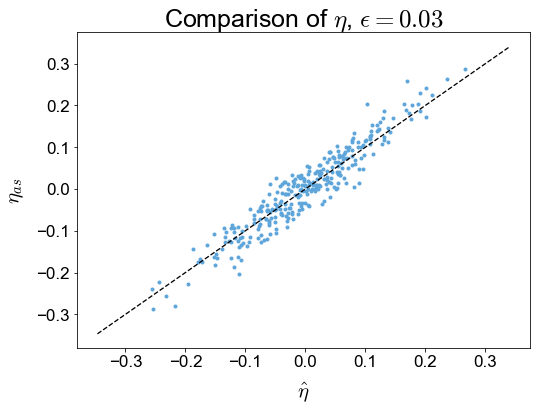

In [263]:
for i,eps in enumerate(epsilons):
    plt.figure()
    plt.plot(eta_hat[i],eta_antisym[i],ls='None',marker='.')
    plt.plot(np.arange(-6,6,0.1)/np.sqrt(K),np.arange(-6,6,0.1)/np.sqrt(K),ls='--',color='k')
    plt.xlabel('$\hat{\eta}$')
    plt.ylabel('$\eta_{as}$')
    plt.title('Comparison of $\eta$, $\epsilon = {}$'.format(eps))

167 out of 300 survive
164 out of 300 survive
170 out of 300 survive
176 out of 300 survive
185 out of 300 survive


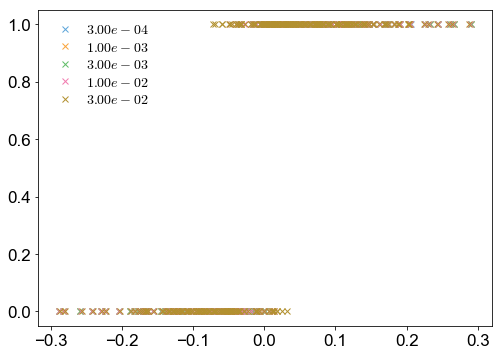

In [264]:
# survival probability vs. antisymmetric $\eta$

plt.figure()
for i,eps in enumerate(epsilons):
    plt.plot(eta_antisym[i],surv_prob[i],ls='None', marker='x',label='${:.2e}$'.format(eps))
    print('{} out of {} survive'.format(np.sum(surv_prob[i]),len(surv_prob[i])))

plt.legend()


In [26]:
# survival CDF

surv_CDF = len(epsilons)*[None]

for i,eps in enumerate(epsilons):
    sort_idx = np.argsort(eta_antisym[i])
    surv_CDF[i] = np.zeros(len(sort_idx))

    surv_CDF[i][0] = surv_prob[i][sort_idx[0]]

    for j,idx in enumerate(sort_idx[1:]):
        surv_CDF[i][j+1] = surv_CDF[i][j]+surv_prob[i][idx]


We again make plots of the cumulative survival probablity. The first are against the antisymmetric estimates
of $\eta$, which get more noisy as $\epsilon$ increases.

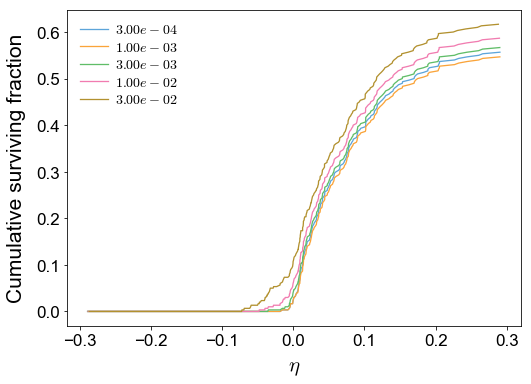

In [266]:
plt.figure()

for i,eps in enumerate(epsilons):
    plt.plot(np.sort(eta_antisym[i]),surv_CDF[i]/K,label='${:.2e}$'.format(eps))
plt.xlabel('$\eta$')
plt.ylabel('Cumulative surviving fraction')
plt.legend()

In [267]:
# null models

null_samps = 3000
gauss_samps = np.sqrt(np.pi)*np.sort(np.random.randn(null_samps))


half_gauss_null = np.zeros(null_samps) # only non-negatives survive

for i,z in enumerate(gauss_samps[1:]):
    half_gauss_null[i+1] = half_gauss_null[i]
    if z>0:
        half_gauss_null[i+1] += 1

half_gauss_null = half_gauss_null*1./null_samps


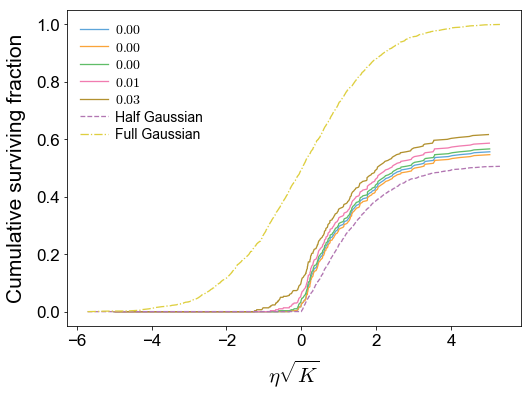

In [268]:
# rescaled etas

plt.figure()

for i,eps in enumerate(epsilons):
    plt.plot(np.sqrt(K)*np.sort(eta_antisym[i]),surv_CDF[i]/K,label='${:.2f}$'.format(eps))
    
# null models
plt.plot(gauss_samps,half_gauss_null,label='Half Gaussian',ls='--')
plt.plot(gauss_samps,np.linspace(0.0,1.0,null_samps),label=r'Full Gaussian',ls='-.')


plt.xlabel('$\eta\sqrt{K}$')
plt.ylabel('Cumulative surviving fraction')
plt.legend()

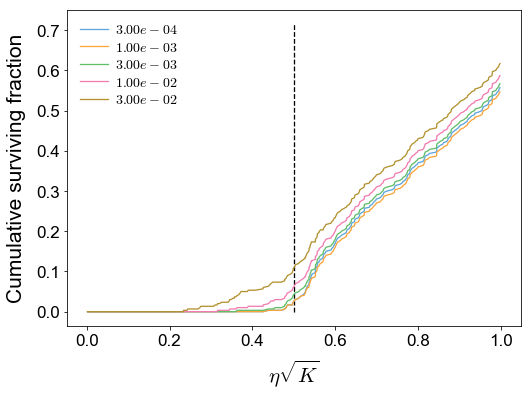

In [270]:
# rescaled etas

plt.figure()

for i,eps in enumerate(epsilons):
    eta_scale = np.sqrt(np.var(eta_antisym[i]))
    cdf_vals = norm.cdf(np.sort(eta_antisym[i])/eta_scale)
    plt.plot(cdf_vals,surv_CDF[i]/K,label='${:.2e}$'.format(eps))
    
# null models
#plt.plot(gauss_samps,half_gauss_null,label='Half Gaussian',ls='--')
#plt.plot(gauss_samps,np.linspace(0.0,1.0,null_samps),label=r'Full Gaussian',ls='-.')
# rescaled etas

plt.vlines(x=0.5,ymin=0,ymax=ys[1],linestyle='--', color='k')


plt.xlabel('$\eta\sqrt{K}$')
plt.ylabel('Cumulative surviving fraction')
plt.legend()

We see that the survival probability seems to increase with $\epsilon$. More detailed testing is needed
to quantitatively understand this relationship.

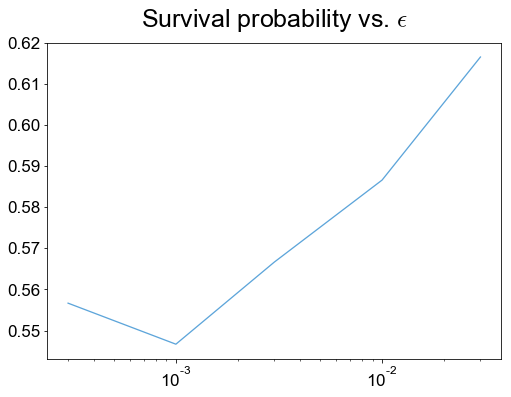

In [271]:
# survival probability vs. K

surv_frac = np.array([np.sum(surv)/len(surv) for surv in surv_prob])
plt.plot(epsilons,surv_frac)
plt.title('Survival probability vs. $\epsilon$',y=1.03)
plt.xscale('log')

167 out of 300 survive
164 out of 300 survive
170 out of 300 survive
176 out of 300 survive
185 out of 300 survive


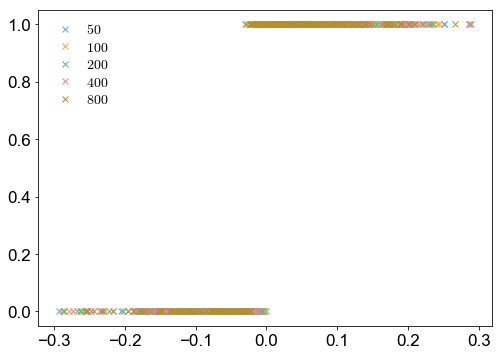

In [272]:
# survival probability vs. $\hat{\eta}$

plt.figure()
for i,K in enumerate(Ks):
    plt.plot(eta_hat[i],surv_prob[i],ls='None', marker='x',label='${}$'.format(K))
    print('{} out of {} survive'.format(np.sum(surv_prob[i]),len(surv_prob[i])))

plt.legend()
    


In [273]:
# survival CDF

surv_CDF = len(Ks)*[None]

for i,K in enumerate(Ks):
    sort_idx = np.argsort(eta_hat[i])
    surv_CDF[i] = np.zeros(len(sort_idx))

    surv_CDF[i][0] = surv_prob[i][sort_idx[0]]

    for j,idx in enumerate(sort_idx[1:]):
        surv_CDF[i][j+1] = surv_CDF[i][j]+surv_prob[i][idx]


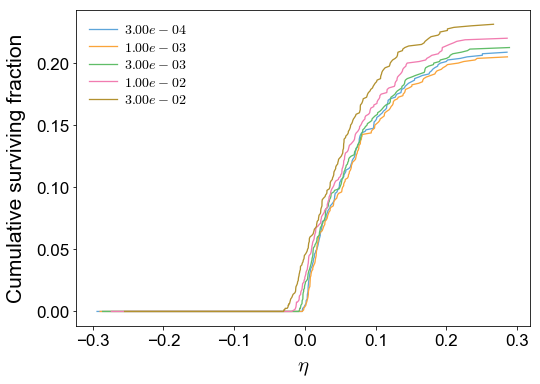

In [274]:
plt.figure()

for i,eps in enumerate(epsilons):
    plt.plot(np.sort(eta_hat[i]),surv_CDF[i]/K,label='${:.2e}$'.format(eps))
plt.xlabel('$\eta$')
plt.ylabel('Cumulative surviving fraction')
plt.legend()

In [275]:
# null models

null_samps = 3000
gauss_samps = np.sqrt(np.pi)*np.sort(np.random.randn(null_samps))


half_gauss_null = np.zeros(null_samps) # only non-negatives survive

for i,z in enumerate(gauss_samps[1:]):
    half_gauss_null[i+1] = half_gauss_null[i]
    if z>0:
        half_gauss_null[i+1] += 1

half_gauss_null = half_gauss_null*1./null_samps


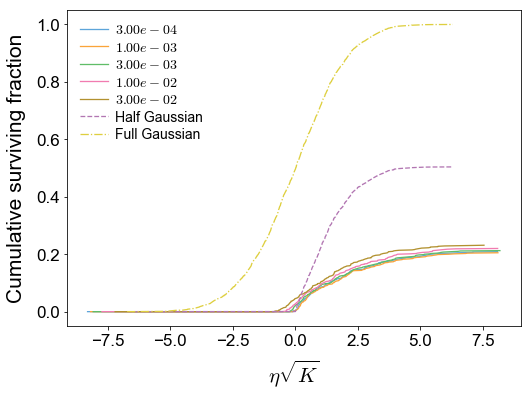

In [276]:
# rescaled etas

plt.figure()

for i,eps in enumerate(epsilons):
    plt.plot(np.sqrt(K)*np.sort(eta_hat[i]),surv_CDF[i]/K,label='${:.2e}$'.format(eps))
    
# null models
plt.plot(gauss_samps,half_gauss_null,label='Half Gaussian',ls='--')
plt.plot(gauss_samps,np.linspace(0.0,1.0,null_samps),label=r'Full Gaussian',ls='-.')


plt.xlabel('$\eta\sqrt{K}$')
plt.ylabel('Cumulative surviving fraction')
plt.legend()

Plotting the cumulative surving fraction against the CDF of the $\langle n\rangle$-derived values of
$\eta$ gets us the best picture of what's happening: for increasing $\epsilon$, types with larger
negative $\eta$ (those with CDF values less than $0.5$, denoted by the black dashed vertical line)
are able to survive.

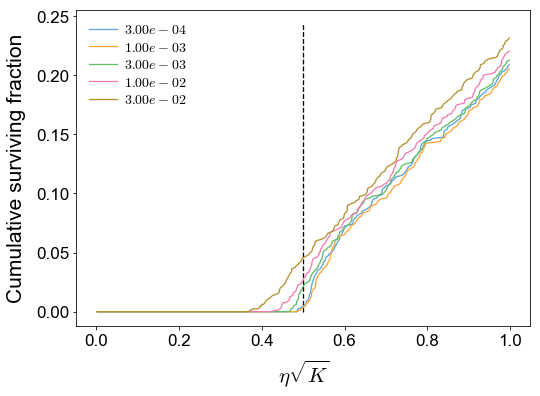

In [277]:
# rescaled etas

plt.figure()

for i,eps in enumerate(epsilons):
    eta_scale = np.sqrt(np.var(eta_hat[i]))
    cdf_vals = norm.cdf(np.sort(eta_hat[i])/eta_scale)
    plt.plot(cdf_vals,surv_CDF[i]/K,label='${:.2e}$'.format(eps))
    
# null models
#plt.plot(gauss_samps,half_gauss_null,label='Half Gaussian',ls='--')
#plt.plot(gauss_samps,np.linspace(0.0,1.0,null_samps),label=r'Full Gaussian',ls='-.')
ys = plt.ylim()
plt.vlines(x=0.5,ymin=0,ymax=ys[1],linestyle='--', color='k')

plt.xlabel('$\eta\sqrt{K}$')
plt.ylabel('Cumulative surviving fraction')
plt.legend()

## Varying $m$

We conclude by examining dependence on the migration rate $m$. More precisely, we probe a variety of
scales of the log migration $M$.

In [27]:
# file_name = 'test_island_evo'

seed = 878943+32948

D = 10
K = 200
Ms = [5,10,20,40]  #M = log(1/m)
gamma = -0.995


file_base = 'M_scaling_test'

# ie.ManyIslandsSim(file_name,D,K,M,gamma,thresh,dt,seed,epoch_time,epoch_num,sample_time)

# ie.InfiniteIslandsSim(file_name,K,M,gamma,dt,seed,epoch_times,sample_time)




In [28]:
for M in Ms:
    logN = 10*M
    thresh = -logN

    t0 = 3*M*K**(1/2)
    dt = (.3)*(M**(-0.5))*K**(1/2)
    sample_time = 10
    epoch_time = 5*t0
    epoch_num = 7
    sample_epoch_start = 4

    epoch_times = epoch_time*np.ones((epoch_num))

    file_name = file_base+'{}'.format(M)
    ie.ExtinctionTimeLong(file_name,D,K,M,gamma,thresh,dt,seed,epoch_time,epoch_num,sample_time)

/home/atish/Dropbox/Ecology/Bacteria phage code/island-evo/island_evo_simulation_methods.py:834: RuntimeWarning: divide by zero encountered in true_divide
  temp_rats = np.divide(nbar, n0) # remove infinities
/home/atish/Dropbox/Ecology/Bacteria phage code/island-evo/island_evo_simulation_methods.py:834: RuntimeWarning: invalid value encountered in true_divide
  temp_rats = np.divide(nbar, n0) # remove infinities


1
2
3
4
5
6
7
1
2
3
4
5
6
7
1
2
3
4
5
6
7
1
2
3
4
5
6
7


In [29]:
# import data

exp_data = {}

for M in Ms:
    file_name = file_base+'{}'.format(M)+'.npz'
    with np.load(file_name) as data:
        exp_data[M] = data['class_obj'].item()


In [281]:
K = exp_data[Ms[0]]['K']

In [38]:
eta_antisym = [exp_data[M]['eta_from_antisymmetric'] for M in Ms]
eta_hat = [exp_data[M]['eta_mean_list'][-1] for M in Ms]
surv_prob = [np.array([~np.isfinite(t_ext) for t_ext in exp_data[M]['extinct_time_array']]) for M in Ms]

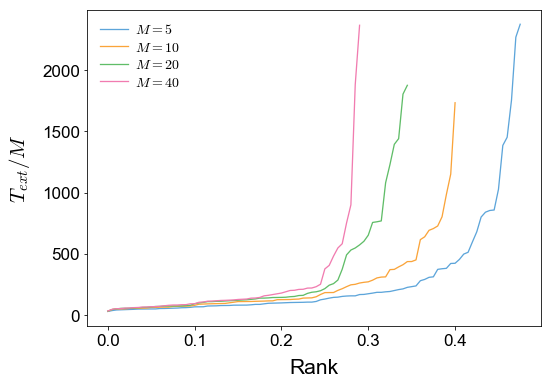

In [32]:
plt.figure()
for i,M in enumerate(Ms):
    plt.plot(np.arange(K)/(1.*K),np.sort(exp_data[M]['extinct_time_array'])/M,label='$M = {}$'.format(M))
    #plt.hlines(y=exp_data[M]['epoch_time']*exp_data[M]['epoch_num'],xmin=0,xmax=1.0,linestyle='--',color='C{}'.format(i))
plt.xlabel('Rank')
plt.ylabel('$T_{ext}/M$')
plt.legend()

M = 5, 102 out of 200 survive
M = 10, 112 out of 200 survive
M = 20, 125 out of 200 survive
M = 40, 134 out of 200 survive


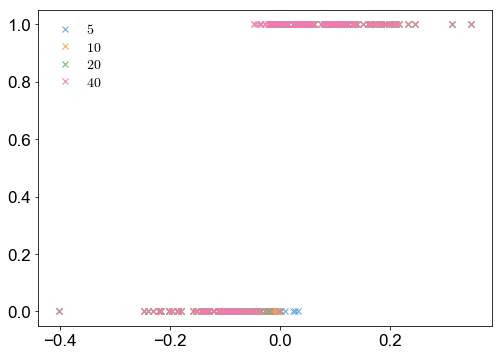

In [284]:
# survival probability vs. antisymmetric $\eta$

plt.figure()
for i,M in enumerate(Ms):
    plt.plot(eta_antisym[i],surv_prob[i],ls='None', marker='x',label='${}$'.format(M))
    print('M = {}, {} out of {} survive'.format(M,np.sum(surv_prob[i]),len(surv_prob[i])))

plt.legend()
    


In [39]:
# survival CDF

surv_CDF = len(Ms)*[None]

for i,M in enumerate(Ms):
    sort_idx = np.argsort(eta_hat[i])
    surv_CDF[i] = np.zeros(len(sort_idx))

    surv_CDF[i][0] = surv_prob[i][sort_idx[0]]

    for j,idx in enumerate(sort_idx[1:]):
        surv_CDF[i][j+1] = surv_CDF[i][j]+surv_prob[i][idx]


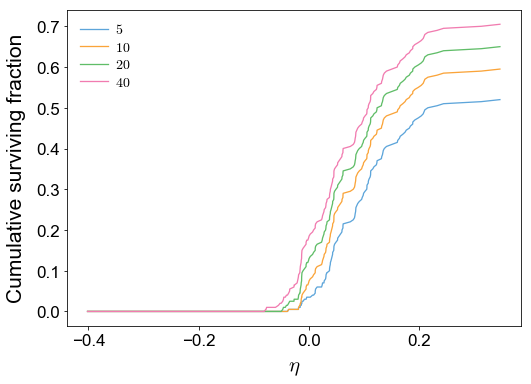

In [34]:
plt.figure()

for i,M in enumerate(Ms):
    plt.plot(np.sort(eta_antisym[i]),surv_CDF[i]/K,label='${}$'.format(M))
plt.xlabel('$\eta$')
plt.ylabel('Cumulative surviving fraction')
plt.legend()

In [287]:
# null models

null_samps = 3000
gauss_samps = np.sqrt(np.pi)*np.sort(np.random.randn(null_samps))


half_gauss_null = np.zeros(null_samps) # only non-negatives survive

for i,z in enumerate(gauss_samps[1:]):
    half_gauss_null[i+1] = half_gauss_null[i]
    if z>0:
        half_gauss_null[i+1] += 1

half_gauss_null = half_gauss_null*1./null_samps


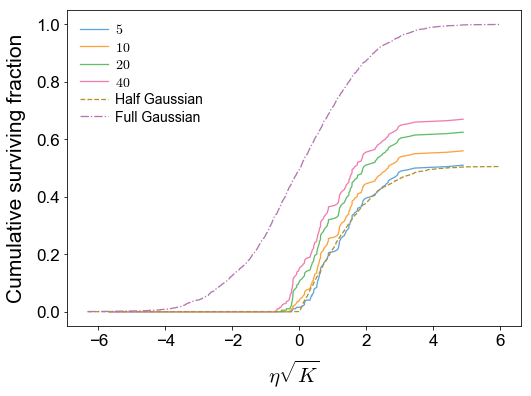

In [288]:
# rescaled etas

plt.figure()

for i,M in enumerate(Ms):
    plt.plot(np.sqrt(K)*np.sort(eta_antisym[i]),surv_CDF[i]/K,label='${}$'.format(M))
    
# null models
plt.plot(gauss_samps,half_gauss_null,label='Half Gaussian',ls='--')
plt.plot(gauss_samps,np.linspace(0.0,1.0,null_samps),label=r'Full Gaussian',ls='-.')


plt.xlabel('$\eta\sqrt{K}$')
plt.ylabel('Cumulative surviving fraction')
plt.legend()

We see that the survival probability increases with $M$. Here plotting the extinction probability
is perhaps the correct comparison, and we see that increasing $M$ from $5$ to $40$ (a factor of $8$)
causes the extinction probability to drop by $1/3$. Over this range, this would roughly correspond to the
critical $\eta$ dropping as $M^{-1/2}$ or so.

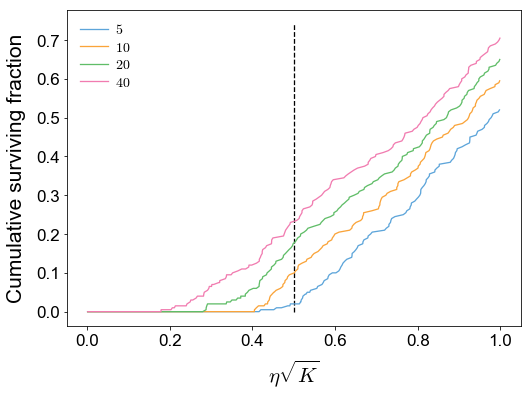

In [40]:
# rescaled etas

plt.figure()

for i,M in enumerate(Ms):
    eta_scale = np.sqrt(np.var(eta_hat[i]))
    cdf_vals = norm.cdf(np.sort(eta_hat[i])/eta_scale)
    plt.plot(cdf_vals,surv_CDF[i]/K,label='${}$'.format(M))
    
# null models
#plt.plot(gauss_samps,half_gauss_null,label='Half Gaussian',ls='--')
#plt.plot(gauss_samps,np.linspace(0.0,1.0,null_samps),label=r'Full Gaussian',ls='-.')
ys = plt.ylim()
plt.vlines(x=0.5,ymin=0,ymax=ys[1],linestyle='--', color='k')

plt.xlabel('$\eta\sqrt{K}$')
plt.ylabel('Cumulative surviving fraction')
plt.legend()

Text(0.5,1.03,'Survival probability vs. $M$')

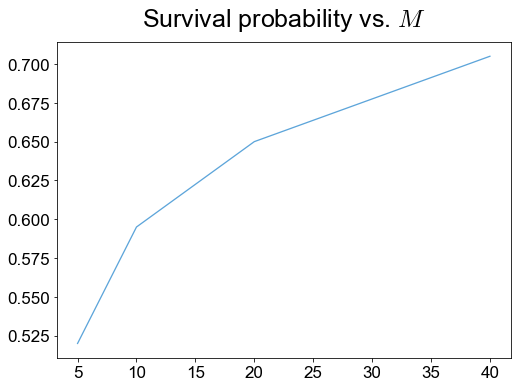

In [41]:
# survival probability vs. K

surv_frac = np.array([np.sum(surv)/len(surv) for surv in surv_prob])
plt.plot(Ms,surv_frac)
plt.title('Survival probability vs. $M$',y=1.03)

Text(0.5,1.03,'Extinction probability vs. $M$')

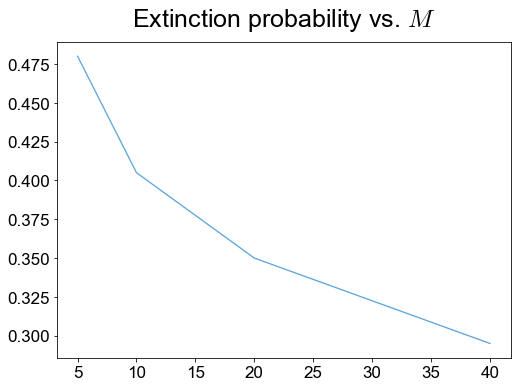

In [42]:
# survival probability vs. K

surv_frac = np.array([np.sum(surv)/len(surv) for surv in surv_prob])
plt.plot(Ms,1-surv_frac)
plt.title('Extinction probability vs. $M$',y=1.03)

# Conclusions

These preliminary numerical results give us a few key conclusions. First, the $\eta$ of the nearest
antisymmetric matrix to $V$ is quite similar to the (numerically estimated) $\eta$ when $\epsilon$
is small. Secondly, it is this $\eta$, rescaled by $\sqrt{K}$ to get the mean field $\eta$, which
seems to control the survival probability. There is also a (weak) non-monotonic dependence of
the surviving fraction on $K$, which needs to be explored in more detail.


Another key finding is that, near $\epsilon = 0$, the fraction of surviving types seems to increase with 
$\epsilon$, continuously rising up from $0.5$ at $\epsilon = 0$. This suggests that the overall
curve of fraction of surviving types vs. $\epsilon$ is non-monotonic - since it decreases
for $\epsilon>0.1$ at least.
Finally, there is strong dependence of the survival probability on $M$ for $\epsilon$ small.

These results, combined with the fact that fixed-point evolution of the antisymmetric model can't build up
diversity, suggest that the diversification potential of the island model depends on the small symmetric
part as well. To confirm this hypothesis we will have to show that for small enough $\epsilon$,
for invasions occuring slower than the equilibration time, there is no ability to build up
diversity in the system.

# SCRATCH

In [4]:
class_data.keys()

dict_keys(['file_name', 'D', 'K', 'M', 'gamma', 'thresh', 'epoch_time', 'epoch_num', 'dt', 'seed', 'sample_time', 'N', 'm', 'epoch_steps', 'sample_num', 'V', 'n0', 'x0', 'increment', 'V1', 'K1', 'n_mean_ave_list', 'n2_mean_ave_list', 'n_cross_mean_list', 'mig_mean_list', 'eta_mean_list', 'eta_from_antisymmetric', 'lambda_mean_ave_list', 'n_mean_std_list', 'n2_mean_std_list', 'lambda_mean_std_list', 'autocorr_list', 'n_init_list', 'extinct_time_array', 'corr_tvec'])

(array([121.,  18.,  20.,  17.,   8.,   9.,   3.,   2.,   0.,   2.]),
 array([0.        , 0.00344742, 0.00689484, 0.01034226, 0.01378968,
        0.0172371 , 0.02068451, 0.02413193, 0.02757935, 0.03102677,
        0.03447419]),
 <a list of 10 Patch objects>)

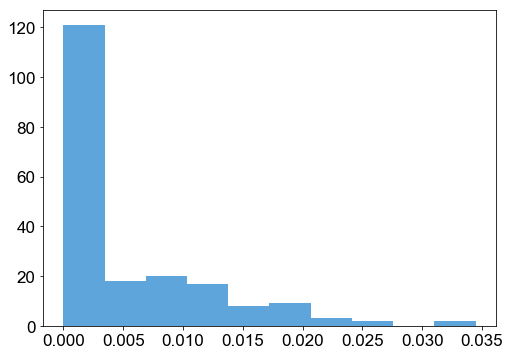

In [5]:
plt.hist(class_data['n_mean_ave_list'][-1])

In [6]:
class_data['mig_mean_list']

[array([205.74576243,  56.46313805,  22.42359963,  58.81235422,
                 nan,  47.93668684,  97.56326505,          nan,
        372.82018845,  61.97388266,  66.27362207,  59.87494362,
        173.96898306,  40.97394123, 393.4813894 ,  46.91412263,
        279.26034037, 304.42099427, 330.13966122,  57.68420924,
                 nan,          nan, 202.4454705 ,  27.56688701,
         41.71911177,  30.73069751, 574.55404444,  83.23063333,
        109.37676591,   8.23247709, 168.02585246,  91.53099337,
         41.98810329, 111.2279337 ,  60.03582945,          nan,
        245.42897688, 206.70733402,  32.06595333,  23.4067887 ,
                 nan,  56.10102907,  96.86761132,          nan,
         28.19858831,          nan,  52.23373409, 139.79197858,
        169.27109223, 237.11796877, 143.84433351, 104.72673366,
         25.90519848, 360.9337666 ,          nan,  30.95535929,
                 nan,  35.12504126, 181.55462885,  31.40530788,
         36.80705836, 229.50120887,     

In [7]:
eta_antisym = class_data['eta_from_antisymmetric']
eta_mig = np.zeros(len(eta_antisym))
for i,eta_mig_T in enumerate(class_data['eta_mean_list']):
    eta_mig += eta_mig_T
eta_mig = eta_mig/len(class_data['eta_mean_list'])

In [8]:
eta_mig = (class_data['eta_mean_list'][-1]+class_data['eta_mean_list'][-2])/2

Text(0.5,1.03,'Distribution of $\\eta$ (antisym calculation)')

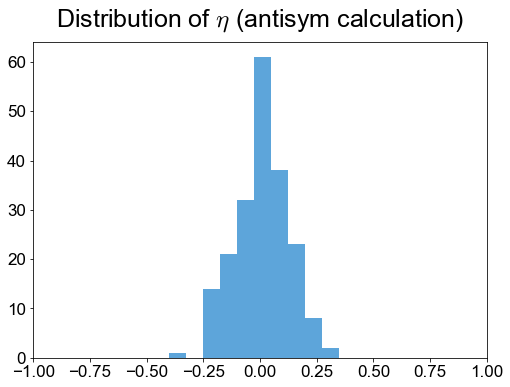

In [9]:
plt.figure()
plt.hist(eta_antisym)
plt.xlim((-1,1))
plt.title('Distribution of $\eta$ (antisym calculation)',y=1.03)

Text(0.5,1.03,'Distribution of $\\eta$ (migration calculation)')

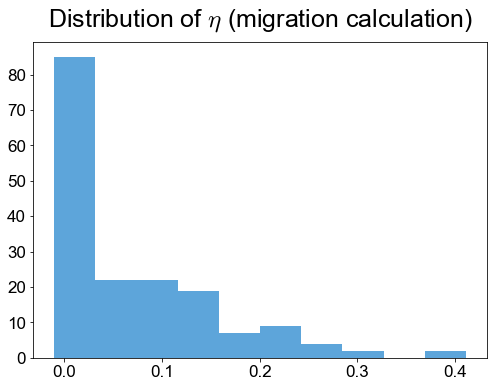

In [10]:
plt.figure()
plt.hist(eta_mig[~np.isnan(eta_mig)])
#plt.xlim((-1,1))
plt.title('Distribution of $\eta$ (migration calculation)',y=1.03)

Text(0.5,1.03,'Migration vs. fixed pt. computation of $\\eta$')

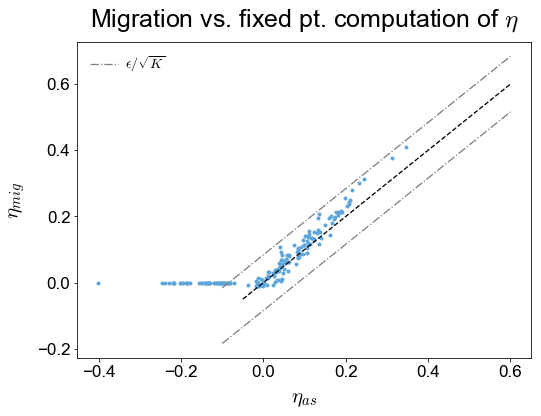

In [11]:
plt.plot(eta_antisym,eta_mig,ls='None',marker='.')
# y = x line
plt.plot(np.linspace(-0.05,0.6,50),np.linspace(-0.05,0.6,50),ls='--',color='k')
# error bars
epsilon = np.sqrt(1-class_data['gamma'])

plt.plot(np.linspace(-0.1,0.6,50),
         np.linspace(-0.1,0.6,50)+np.sqrt(epsilon/len(eta_antisym)),ls='-.',
         color='grey',label='$\epsilon/\sqrt{K}$')
plt.plot(np.linspace(-0.1,0.6,50),np.linspace(-0.1,0.6,50)-np.sqrt(epsilon/len(eta_antisym)),ls='-.',
         color='grey')

plt.legend()

plt.ylabel('$\eta_{mig}$')
plt.xlabel('$\eta_{as}$')
plt.title('Migration vs. fixed pt. computation of $\eta$',y=1.03)

Text(0.5,1.03,'Migration vs. fixed pt. computation of $\\eta$')

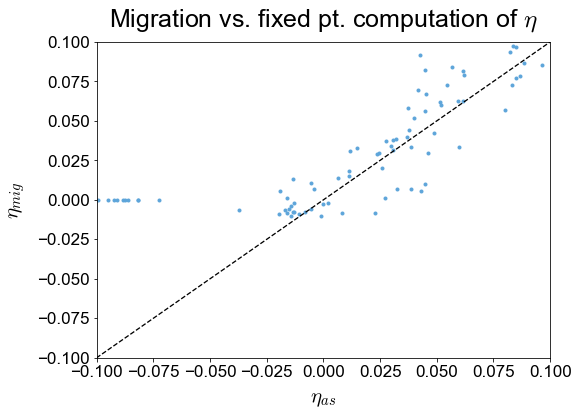

In [12]:
plt.plot(eta_antisym,eta_mig,ls='None',marker='.')
# y = x line
plt.plot(np.linspace(-0.2,0.6,50),np.linspace(-0.2,0.6,50),ls='--',color='k')
# error bars
epsilon = np.sqrt(1-class_data['gamma'])

#plt.plot(np.linspace(-0.2,0.6,50),
#         np.linspace(-0.2,0.6,50)+np.sqrt(epsilon/len(eta_antisym)),ls='-.',
#         color='grey',label='$\epsilon/\sqrt{K}$')
#plt.plot(np.linspace(-0.05,0.6,50),np.linspace(-0.05,0.6,50)-np.sqrt(epsilon/len(eta_antisym)),ls='-.',
#         color='grey')

plt.xlim((-0.1,0.1))
plt.ylim((-0.1,0.1))
#plt.legend()

plt.ylabel('$\eta_{mig}$')
plt.xlabel('$\eta_{as}$')
plt.title('Migration vs. fixed pt. computation of $\eta$',y=1.03)

127 out of 200 survive


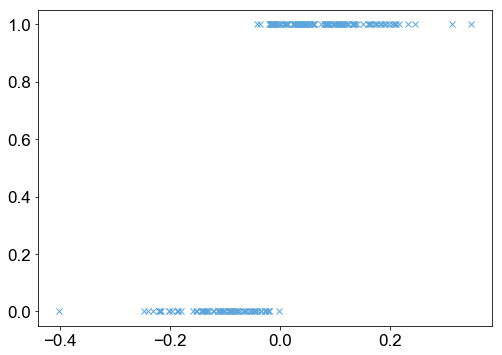

In [17]:
# survival probability vs. antisymmetric $\eta$
surv_prob = np.array([~np.isfinite(t_ext) for t_ext in class_data['extinct_time_array']])
plt.figure()
plt.plot(eta_antisym,surv_prob,ls='None', marker='x')

print('{} out of {} survive'.format(np.sum(surv_prob),len(surv_prob)))

In [18]:
# survival CDF
sort_idx = np.argsort(eta_antisym)
surv_CDF = np.zeros(len(sort_idx))

surv_CDF[0] = surv_prob[sort_idx[0]]

for i,idx in enumerate(sort_idx[1:]):
    surv_CDF[i+1] = surv_CDF[i]+surv_prob[idx]


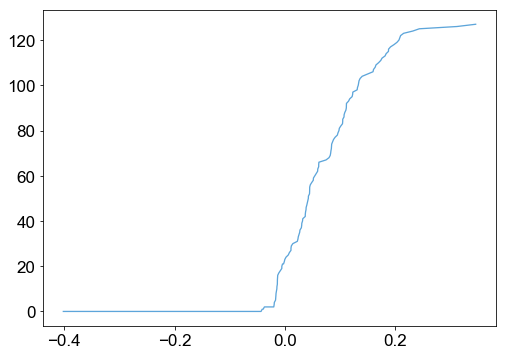

In [20]:
plt.plot(np.sort(eta_antisym),surv_CDF)

In [ ]:
# survival probability vs. antisymmetric $\eta$
surv_prob = [~np.isfinite(t_ext) for t_ext in class_data['extinct_time_array']]
plt.figure()
plt.plot(eta_antisym,surv_prob,ls='None', marker='x')

print('{} out of {} survive'.format(np.sum(surv_prob),len(surv_prob)))

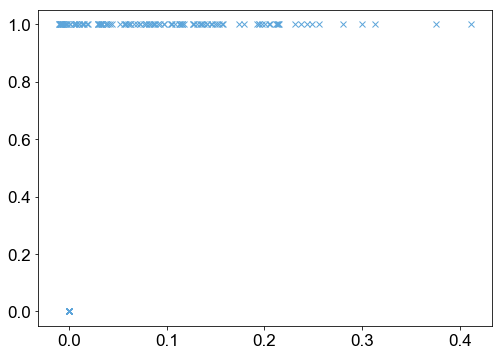

In [14]:
plt.figure()
plt.plot(eta_mig,surv_prob,ls='None', marker='x')


In [15]:
class_data['extinct_time_array']

array([           inf,            inf,            inf,            inf,
        7353.30000001,            inf,            inf,  7375.00000001,
       18177.50000002,            inf,            inf,            inf,
                  inf,            inf, 15703.10000004,            inf,
                  inf, 21904.49999996, 13087.20000003,            inf,
        6610.70000001,  8898.10000001,            inf,            inf,
                  inf,            inf, 10437.80000002,            inf,
                  inf,            inf,            inf,            inf,
                  inf,            inf,            inf,  8750.70000001,
                  inf,            inf,            inf,            inf,
        7260.30000001,            inf,            inf,  7794.10000001,
                  inf,  4103.3       ,            inf,            inf,
                  inf,            inf,            inf,            inf,
                  inf, 27367.79999988,  8694.40000001,            inf,
      

In [16]:
eta_antisym

array([-3.70389360e-02,  1.11713426e-01,  1.88023244e-01,  4.26772365e-02,
       -1.28807770e-01,  4.62593767e-02,  3.87118680e-02, -1.39707115e-01,
       -4.58236695e-02,  4.49927340e-02,  3.05792881e-02,  5.16123416e-02,
        1.63722217e-05,  8.47774034e-02, -5.55150848e-02,  4.07526293e-02,
       -1.93594466e-02, -6.11230926e-02, -9.09476854e-02,  4.87826503e-02,
       -1.33763363e-01, -1.32841267e-01, -1.34183053e-02,  8.36692189e-02,
        4.51520492e-02,  9.89059338e-02, -8.61866840e-02,  6.34892053e-03,
        1.11848432e-02,  2.03439151e-01, -4.15285084e-03,  3.26009049e-02,
        2.08553822e-01, -1.35753431e-02,  3.71647226e-02, -1.07779445e-01,
       -9.59469137e-04, -1.64308438e-02,  9.53378654e-02,  1.05088028e-01,
       -1.50467085e-01,  8.44251103e-02,  5.67825719e-02, -1.42826632e-01,
        1.33942861e-01, -2.47402271e-01,  8.24012332e-02, -1.28736274e-02,
       -8.29838314e-03, -1.50906703e-02,  1.18684983e-02,  1.11464265e-02,
        1.74103117e-01, -